# Modeling Exercises

## Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.

Visualize the results of your clustering.

Use the elbow method to visually select a good value for k.

Repeat the clustering, this time with 3 different features.

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
import wrangle_mall
import wrangle_iris
np.random.seed(4)

In [2]:
# get data from wrange_iris
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_iris.wrangle_iris_data()

In [3]:
# verify train columns
train.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_versicolor', 'species_virginica'],
      dtype='object')

In [4]:
# verify train_scaled columns
train_scaled.columns

Index(['species_versicolor', 'species_virginica', 'sepal_length_scaled',
       'sepal_width_scaled', 'petal_length_scaled', 'petal_width_scaled'],
      dtype='object')

**Cluster**

- choose features to cluster on
- choose k
- create and fit the model

In [5]:
# select the columns to cluster on 
X = train_scaled[['petal_width_scaled', 'sepal_width_scaled']]
# create the object
kmeans = KMeans(n_clusters=3)
# fit the object
kmeans.fit(X)

KMeans(n_clusters=3)

1. Look at the model's output
2. interpretation
3. visualize

In [6]:
# evaluate the object
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width_scaled,sepal_width_scaled
0,0.489943,0.227273
1,0.072531,0.595960
2,0.802083,0.383117


In [7]:
# use the labels from the object to create cluster feature
train['cluster'] = kmeans.labels_

In [8]:
train

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,cluster
79,versicolor,5.7,2.6,3.5,1.0,1,0,0
36,setosa,5.5,3.5,1.3,0.2,0,0,1
133,virginica,6.3,2.8,5.1,1.5,0,1,0
95,versicolor,5.7,3.0,4.2,1.2,1,0,0
18,setosa,5.7,3.8,1.7,0.3,0,0,1
...,...,...,...,...,...,...,...,...
11,setosa,4.8,3.4,1.6,0.2,0,0,1
85,versicolor,6.0,3.4,4.5,1.6,1,0,2
55,versicolor,5.7,2.8,4.5,1.3,1,0,0
44,setosa,5.1,3.8,1.9,0.4,0,0,1


In [9]:
# visualize with table
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
cluster,,,,,,
0,5.872414,2.700000,4.241379,1.275862,0.862069,0.103448
1,5.111111,3.511111,1.514815,0.274074,0.000000,0.000000
2,6.600000,3.042857,5.460714,2.025000,0.107143,0.892857


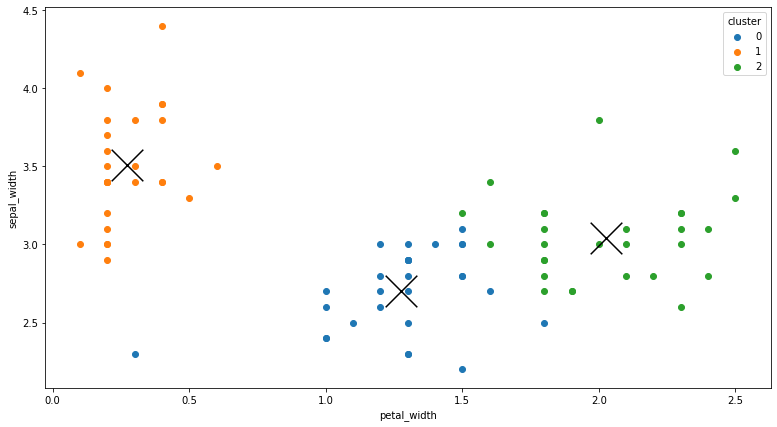

In [10]:
# visualize with chart
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=1000, ax=ax, c='black')

In [11]:
# elbow method
# sum of squared distances from each point to its cluster center
kmeans.inertia_

2.3413199854076825

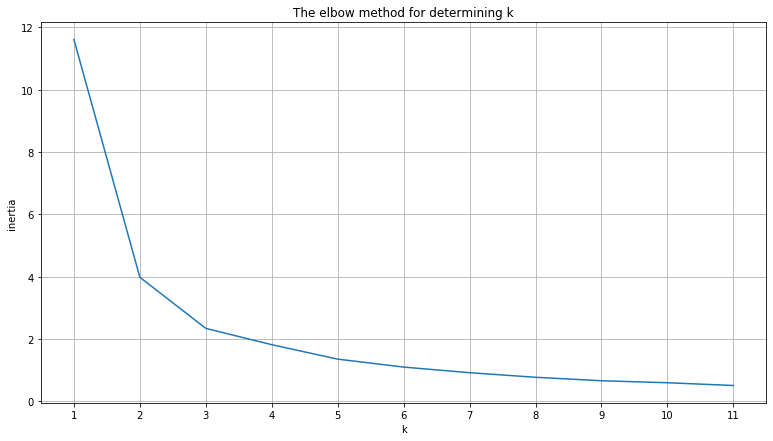

In [12]:
# create elbow method visualization
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [13]:
# based on elbow method changed k from 4 to 3 and reran above

Repeat the clustering, this time with 3 different features. 


In [14]:
# select the columns to cluster on 
X = train_scaled[['petal_width_scaled', 'sepal_width_scaled', 'petal_length_scaled']]
# create the object
kmeans = KMeans(n_clusters=4)
# fit the object
kmeans.fit(X)

KMeans(n_clusters=4)

In [15]:
# evaluate the object
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width_scaled,sepal_width_scaled,petal_length_scaled
0,0.504310,0.255486,0.545070
1,0.071759,0.467172,0.051657
2,0.813272,0.365320,0.762183
3,0.075000,0.772727,0.057895


In [16]:
# use the labels from the object to create cluster feature
train['cluster'] = kmeans.labels_

In [17]:
# visualize with table
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
cluster,,,,,,
0,5.913793,2.762069,4.306897,1.310345,0.931034,0.068966
1,4.933333,3.227778,1.494444,0.272222,0.000000,0.000000
2,6.633333,3.003704,5.544444,2.051852,0.037037,0.962963
3,5.370000,3.900000,1.530000,0.280000,0.000000,0.000000


### not scaled data

In [18]:
# select the columns to cluster on 
X = train[['petal_width', 'petal_length']]
# create the object
kmeans = KMeans(n_clusters=4)
# fit the object
kmeans.fit(X)

KMeans(n_clusters=4)

In [19]:
# evaluate the object
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width,petal_length
0,0.275000,1.507143
1,1.276000,4.192000
2,1.905263,5.157895
3,2.108333,5.983333


In [20]:
# use the labels from the object to create cluster feature
train['cluster'] = kmeans.labels_
# visualize with table
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
cluster,,,,,,
0,5.089286,3.467857,1.507143,0.275000,0.000000,0.000000
1,5.852000,2.772000,4.192000,1.276000,1.000000,0.000000
2,6.336842,2.900000,5.157895,1.905263,0.157895,0.842105
3,6.991667,3.066667,5.983333,2.108333,0.000000,1.000000


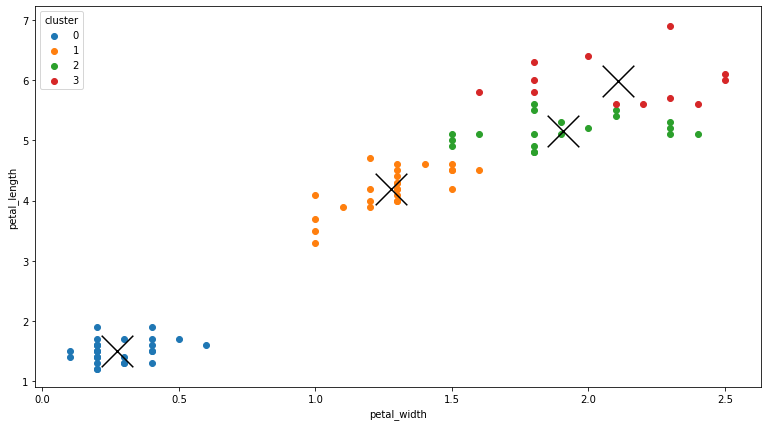

In [21]:
# visualize with chart
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.petal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')

train.groupby('cluster').mean().plot.scatter(y='petal_length', x='petal_width', marker='x', s=1000, ax=ax, c='black')


# Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [22]:
# get data from wrange_mall
mtrain, mvalidate, mtest, mtrain_scaled, mvalidate_scaled, mtest_scaled = wrangle_mall.wrangle_mall_data()

In [23]:
mtrain.columns

Index(['age', 'annual_income', 'spending_score', 'gender_Male'], dtype='object')

In [24]:
mtrain_scaled.columns

Index(['gender_Male', 'spending_score_scaled', 'annual_income_scaled',
       'age_scaled'],
      dtype='object')

In [26]:
# make copy of mtrain for later
m2train = mtrain.copy()
mtrainu = mtrain.copy()

In [27]:
# select the columns to cluster on 
mX = mtrain_scaled[['spending_score_scaled', 'annual_income_scaled']]
# create the object
mkmeans = KMeans(n_clusters=5)
# fit the object
mkmeans.fit(mX)

KMeans(n_clusters=5)

In [28]:
# elbow method
# sum of squared distances from each point to its cluster center
mkmeans.inertia_

2.543925070543645

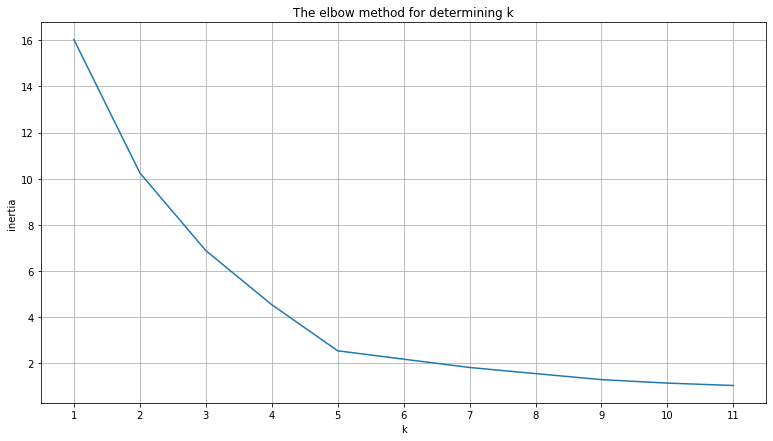

In [29]:
# create elbow method visualization
moutput = {}

for k in range(1, 12):
    mkmeans = KMeans(n_clusters=k)
    mkmeans.fit(mX)
    moutput[k] = mkmeans.inertia_

ax = pd.Series(moutput).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [30]:
# rerun this here so have 5 groups, not 12 from above
# select the columns to cluster on 
mX = mtrain_scaled[['spending_score_scaled', 'annual_income_scaled']]
# create the object
mkmeans = KMeans(n_clusters=5)
# fit the object
mkmeans.fit(mX)

KMeans(n_clusters=5)

In [31]:
# evaluate the object
pd.DataFrame(mkmeans.cluster_centers_, columns=mX.columns)

,spending_score_scaled,annual_income_scaled
0,0.492985,0.325051
1,0.801321,0.086789
2,0.173469,0.600969
3,0.157526,0.076332
4,0.803265,0.605246


In [32]:
# use the labels from the object to create cluster feature
mtrain['cluster'] = mkmeans.labels_
# visualize with table
mtrain.groupby('cluster').mean()

,age,annual_income,spending_score,gender_Male
cluster,,,,
0,43.125000,54.656250,49.312500,0.390625
1,24.764706,25.588235,79.529412,0.470588
2,40.909091,88.318182,18.000000,0.409091
3,45.687500,24.312500,16.437500,0.437500
4,32.040000,88.840000,79.720000,0.400000


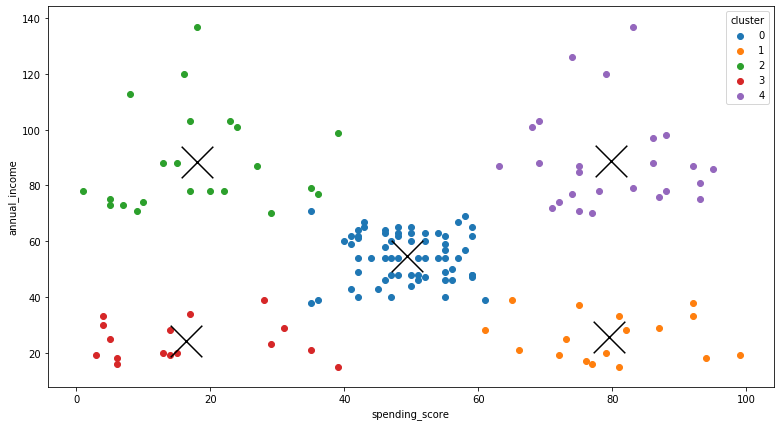

In [33]:
# visualize with chart
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in mtrain.groupby('cluster'):
    ax.scatter(subset.spending_score, subset.annual_income, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='annual income', xlabel='spending score')

mtrain.groupby('cluster').mean().plot.scatter(y='annual_income', x='spending_score', marker='x', s=1000, ax=ax, c='black')

In [45]:

# select the columns to cluster on 
m2X = mtrain_scaled[['age_scaled', 'annual_income_scaled']]
# create the object
m2kmeans = KMeans(n_clusters=5)
# fit the object
m2kmeans.fit(m2X)

KMeans(n_clusters=5)

In [46]:
# evaluate the object
pd.DataFrame(m2kmeans.cluster_centers_, columns=m2X.columns)

,age_scaled,annual_income_scaled
0,0.070513,0.372756
1,0.854515,0.243407
2,0.294471,0.644980
3,0.171016,0.101581
4,0.568750,0.373566


In [47]:
# use the labels from the object to create cluster feature
m2train['cluster'] = m2kmeans.labels_
# visualize with table
m2train.groupby('cluster').mean()

,age,annual_income,spending_score,gender_Male
cluster,,,,
0,21.666667,60.476190,47.190476,0.476190
1,62.434783,44.695652,39.130435,0.565217
2,33.312500,93.687500,62.875000,0.375000
3,26.892857,27.392857,61.785714,0.357143
4,47.575000,60.575000,38.175000,0.350000


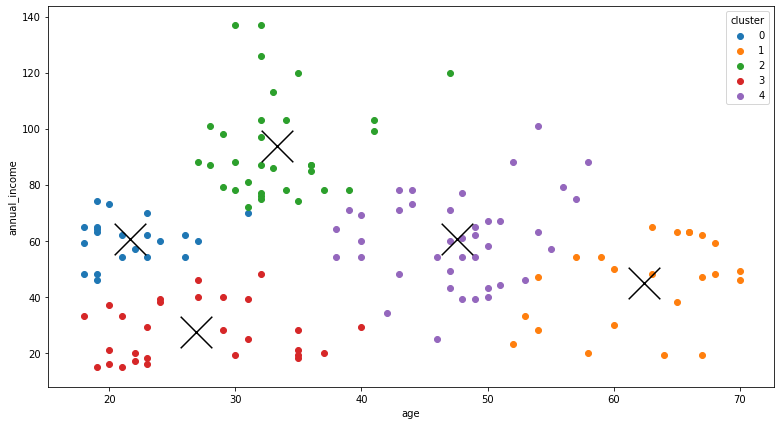

In [50]:
# visualize with chart
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in m2train.groupby('cluster'):
    ax.scatter(subset.age, subset.annual_income, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='annual income', xlabel='age')

m2train.groupby('cluster').mean().plot.scatter(y='annual_income', x='age', marker='x', s=1000, ax=ax, c='black')

### not scaled data

In [41]:
# rerun this here so have 5 groups, not 12 from above
# select the columns to cluster on 
mXu = mtrain[['age', 'annual_income']]
# create the object
mkmeansu = KMeans(n_clusters=5)
# fit the object
mkmeansu.fit(mXu)

KMeans(n_clusters=5)

In [42]:
# evaluate the object
pd.DataFrame(mkmeansu.cluster_centers_, columns=mXu.columns)

,age,annual_income
0,22.652174,58.608696
1,32.636364,25.484848
2,35.714286,111.285714
3,55.000000,52.341463
4,38.181818,78.575758


In [43]:
# use the labels from the object to create cluster feature
mtrainu['cluster'] = mkmeansu.labels_
# visualize with table
mtrainu.groupby('cluster').mean()

,age,annual_income,spending_score,gender_Male
cluster,,,,
0,22.652174,58.608696,46.391304,0.478261
1,32.636364,25.484848,52.393939,0.393939
2,35.714286,111.285714,49.428571,0.357143
3,55.000000,52.341463,45.951220,0.414634
4,38.181818,78.575758,54.181818,0.393939


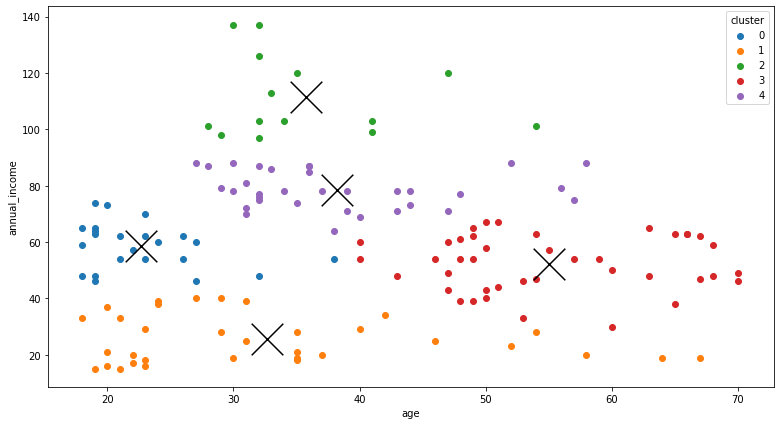

In [51]:
# visualize with chart
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in mtrainu.groupby('cluster'):
    ax.scatter(subset.age, subset.annual_income, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='annual income', xlabel='age')

mtrainu.groupby('cluster').mean().plot.scatter(y='annual_income', x='age', marker='x', s=1000, ax=ax, c='black')